In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(bind=engine)
session = Session()

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
df = pd.read_csv('Resources/hawaii_measurements.csv')
most_recent_date = df['date'].max()
print(most_recent_date)

2017-08-23


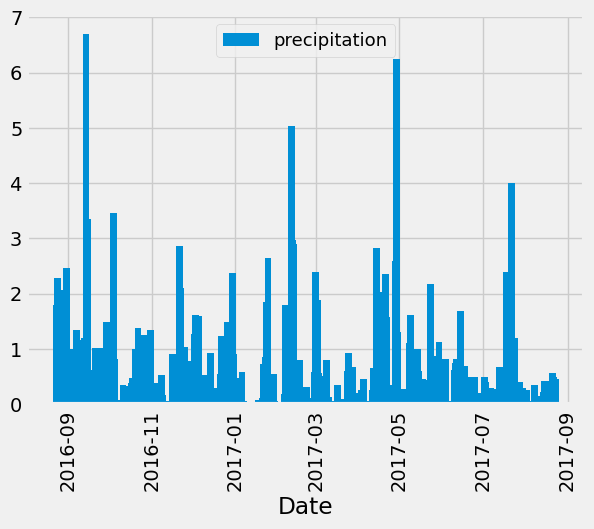

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = datetime.strptime(most_recent_date, '%Y-%m-%d') - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy import Table, MetaData

metadata = MetaData()
metadata.reflect(engine)
Measurement = metadata.tables['measurement']

session = Session(engine)

results = session.query(Measurement.c.date, Measurement.c.prcp).all()
results = session.query(Measurement.c.date, Measurement.c.prcp).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df

# Sort the dataframe by date
mask = (df['date'] >= str(one_year_ago.date())) & (df['date'] <= most_recent_date)
filtered_df = df.loc[mask].copy()
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df.sort_values('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(filtered_df['date'], filtered_df['precipitation'],  width=5.0, label='precipitation', capstyle='round')
plt.xlabel('Date')
plt.legend(loc='upper center', labels=["precipitation"], fontsize=13) 
plt.xticks(rotation=90)
plt.show()

In [15]:
type(filtered_df['precipitation'].describe())

pandas.core.series.Series

In [16]:
filtered_df['precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
filtered_df['precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
import pandas as pd
stations_df = pd.read_csv('Resources/hawaii_stations.csv')
df = pd.read_csv('Resources/hawaii_measurements.csv')
total_stations = stations_df['station'].nunique()
print(total_stations)

9


In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = df['station'].value_counts().reset_index()
station_activity.columns = ['station', 'counts']
print(station_activity)

       station  counts
0  USC00519281    2772
1  USC00519397    2724
2  USC00513117    2709
3  USC00519523    2669
4  USC00516128    2612
5  USC00514830    2202
6  USC00511918    1979
7  USC00517948    1372
8  USC00518838     511


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
measurements_df = pd.read_csv('Resources/hawaii_measurements.csv')
most_active_station = station_activity.iloc[0]['station']
temperature_stats = measurements_df[measurements_df['station'] == most_active_station]['tobs'].agg(['min', 'max', 'mean'])
print(temperature_stats)

min     54.000000
max     85.000000
mean    71.663781
Name: tobs, dtype: float64


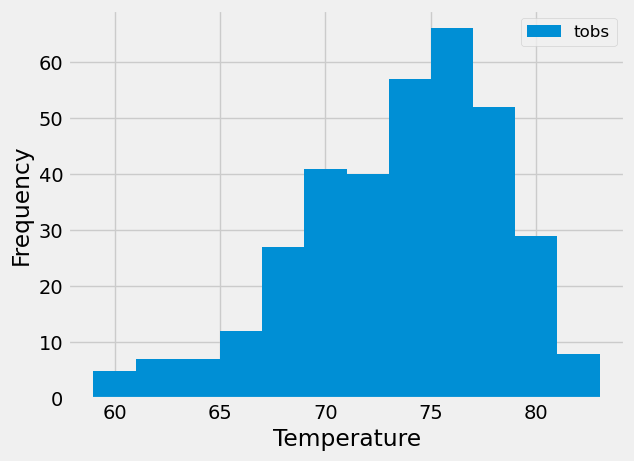

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
measurements_df['date'] = pd.to_datetime(measurements_df['date'])
most_recent_date = measurements_df['date'].max()
one_year_ago = most_recent_date - pd.Timedelta(days=365)


last_year_data = measurements_df[(measurements_df['date'] > one_year_ago) & (measurements_df['station'] == most_active_station)]

last_year_data['tobs'].hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(labels=["tobs"], fontsize=12) 
plt.show()

# Close Session

In [22]:
# Close Session
session.close()